In [3]:
import pandas as pd
import numpy as np
# Datetimeindex
dates = pd.date_range('2020-01-01',periods=48, freq='M')

# 
timestamp = np.arange(len(dates))
trend_facotr = timestamp*1.1
cycle_factor = 10*np.sin(np.linspace(0,3.14*2, 48))
sesonal_fctor = 7*np.sin(np.linspace(0, 3.14*8, 48))
np.random.seed(2004)
irregular_factor = 2*np.random.randn(len(dates))

df = pd.DataFrame({'timeseries':trend_facotr+ cycle_factor + sesonal_fctor + irregular_factor,'trend':trend_facotr, 'cycle': cycle_factor,'seasonal': sesonal_fctor, 'irregular':irregular_factor}, index=dates)

In [4]:
df.head()

,timeseries,trend,cycle,seasonal,irregular
2020-01-31,2.596119,0.0,0.000000,0.000000,2.596119
2020-02-29,6.746160,1.1,1.332198,3.565684,0.748278
2020-03-31,8.112100,2.2,2.640647,6.136825,-2.865371
2020-04-30,8.255941,3.3,3.902021,6.996279,-5.942358
2020-05-31,16.889655,4.4,5.093834,5.904327,1.491495


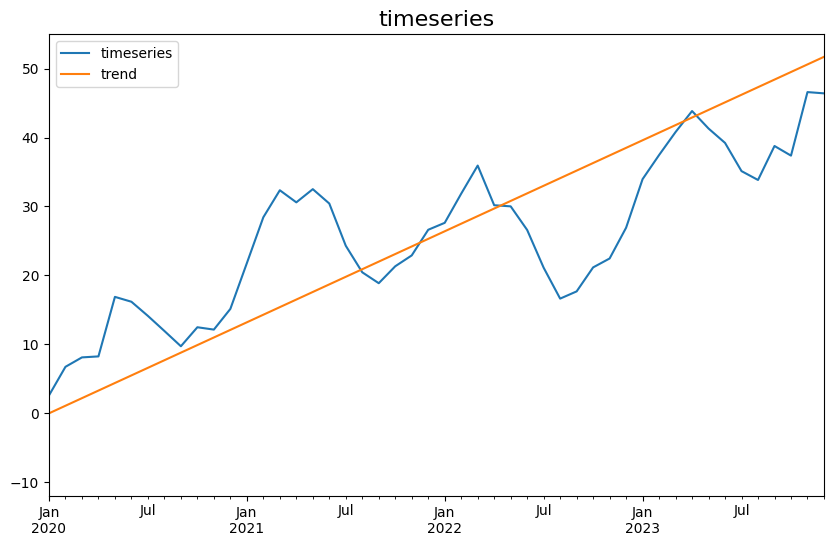

In [6]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=[10,6])
df.timeseries.plot()
df.trend.plot()
plt.legend()
plt.title("timeseries",fontsize=16)
plt.ylim(-12,55)
plt.show()


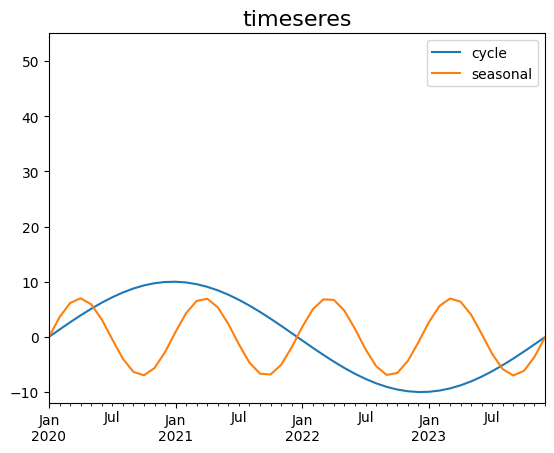

In [7]:

df.cycle.plot()
df.seasonal.plot()
plt.legend()
plt.title("timeseres",fontsize=16)
plt.ylim(-12,55)
plt.show()


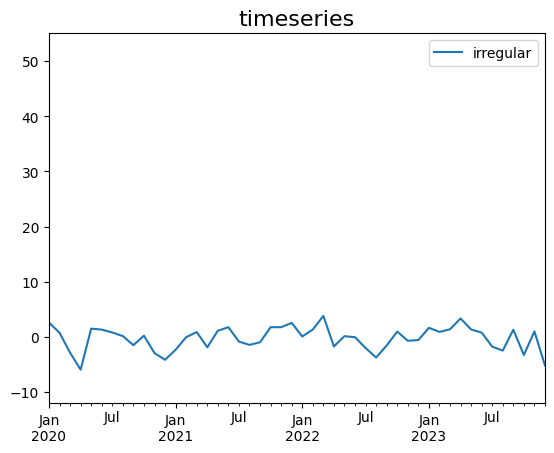

In [8]:

df.irregular.plot()
plt.legend()
plt.title("timeseries",fontsize=16)
plt.ylim(-12,55)
plt.show()

In [10]:
import FinanceDataReader as fdr

alphabet = fdr.DataReader('GOOG' , '2012-01-01', '2022-12-31')

In [12]:
alphabet.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,233776981


In [13]:
alphabet.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [19]:
# Close 0값 제거 

data = alphabet['Close'][alphabet['Close'] !=0 ]
data.values

array([16.57313 , 16.644611, 16.413727, ..., 86.459999, 88.949997,
       88.730003])

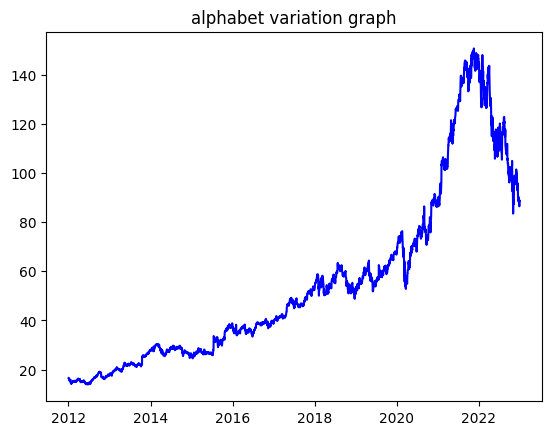

In [16]:
# 시각화
import matplotlib.pyplot as plt

plt.plot(data , c='b' , label="original")
plt.title("alphabet variation graph")
plt.show()

#### ADF test(Augmented Dickey-Fuller Test)
* 귀무가설 : 정상성이 없다 , 대립가설: 정상성이 있다.
* statsmodels.tsa.stattools.adfuller
*  statsmodels.tsa.stattools.adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

In [22]:
from statsmodels.tsa.stattools import adfuller
def adf_test(data):
    result = adfuller(data.values)
    print(result)
    print(f'p-value :P {result[1]}')
    

In [23]:
adf_test(data)

(-0.8445247584484338, 0.8056922493142407, 22, 2745, {'1%': -3.432734490222307, '5%': -2.8625934964497826, '10%': -2.567330809950863}, 8855.653897404096)
p-value :P 0.8056922493142407


#### SMA 
* pandas 의 Series.rolling()
* pandas.Series.rolling
* Series.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=_NoDefault.no_default, closed=None, step=None, method='single'

In [24]:
interval = 50
rolmean = alphabet['Close'].rolling(window =interval).mean()

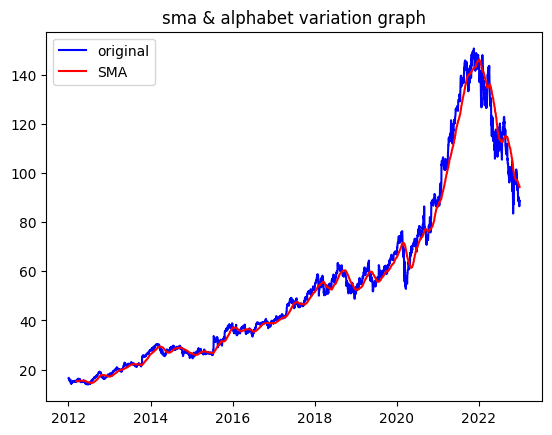

In [27]:
# 시각화
import matplotlib.pyplot as plt

plt.plot(data , c='b' , label="original")
plt.plot(rolmean , c='r' , label="SMA")
plt.title("sma & alphabet variation graph")
plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, '애플 종가')

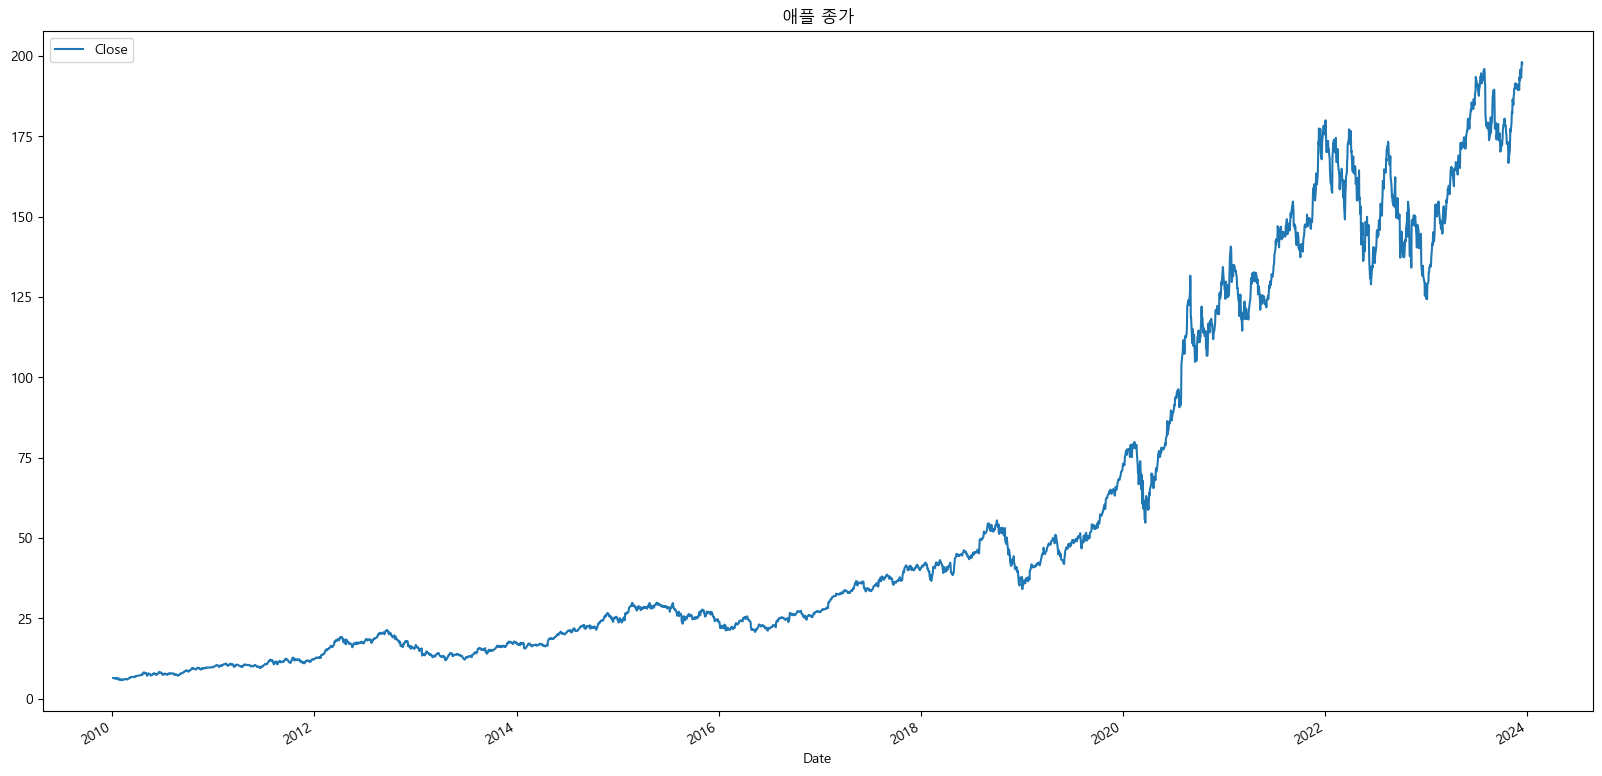

In [29]:
from datetime import datetime 
%matplotlib inline 

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

aapl = fdr.DataReader('AAPL', start ='2010')

aapl[['Close']].plot(figsize=(20,10))
aapl['7day_mean'] =aapl['Close'].rolling(7).mean()
plt.title('애플 종가')

In [34]:
ewm_data.values

array([  6.478998  ,   6.48809962,   6.40933579, ..., 197.1542985 ,
       197.88945427, 197.6437256 ])

#### 지수평균이동법 
* EMA
* pandas.Series.ewm
* Series.ewm(com=None, span=None, halflife=None, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=_NoDefault.no_default, times=None, method='single')

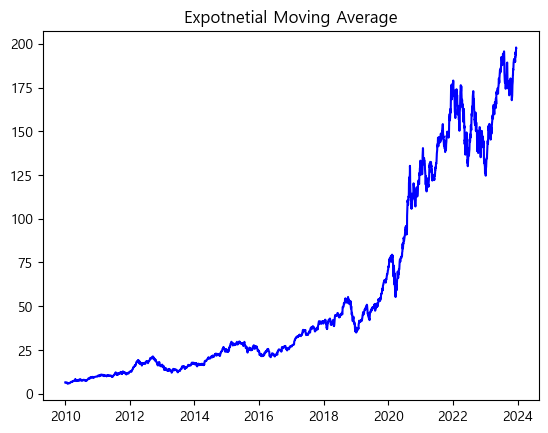

In [36]:
ewm_data = aapl['Close'].ewm(com=0.3).mean()
plt.plot(ewm_data, c='b', label='EWM_APPL')
plt.title('Expotnetial Moving Average')
plt.show()

#### ACF , PACF
* statsmodels.graphics.tsaplots.plot_acf(x, ax=None, lags=None, *, alpha=0.05, use_vlines=True, adjusted=False, fft=False, missing='none', title='Autocorrelation', zero=True, auto_ylims=False, bartlett_confint=True, vlines_kwargs=None, **kwargs)

* statsmodels.graphics.tsaplots.plot_pacf(x, ax=None, lags=None, alpha=0.05, method='ywm', use_vlines=True, title='Partial Autocorrelation', zero=True, vlines_kwargs=None, **kwargs)


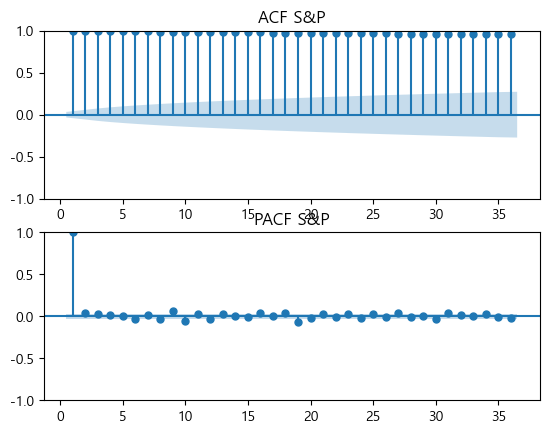

In [43]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf


## Close
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

plot_acf(aapl['Close'], zero = False, ax=ax1)
ax1.set_title("ACF S&P")


plot_pacf(aapl['Close'], zero = False, method = ('ols'), ax=ax2)
ax2.set_title("PACF S&P")

plt.show()

#### 차분
* pandas.DataFrame.diff
* DataFrame.diff(periods=1, axis=0)


In [47]:
aapl['log_Close']= np.log(aapl['Close'])

aapl_diff_1 = aapl['log_Close'].diff().dropna()

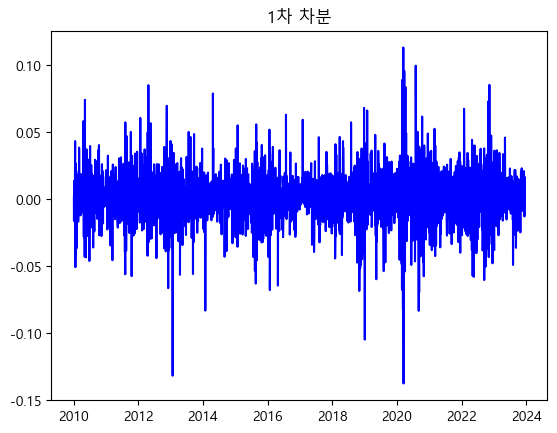

In [48]:
plt.plot(aapl_diff_1 , c='b' , label="differencing 1")
plt.title("1차 차분")
plt.show()

In [51]:
rol_mean = aapl_diff_1.rolling(5).mean()

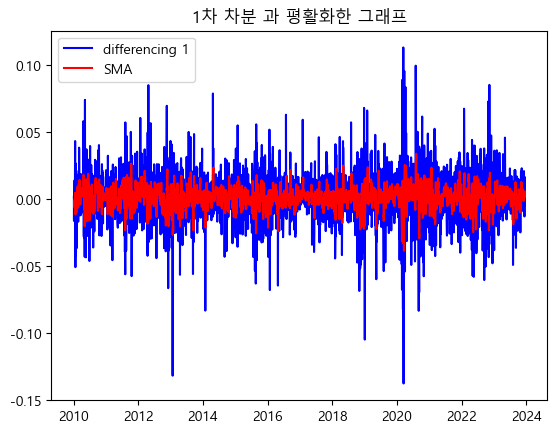

In [52]:
plt.plot(aapl_diff_1 , c='b' , label="differencing 1")
plt.plot(rol_mean , c='r' , label="SMA")
plt.title("1차 차분 과 평활화한 그래프")
plt.legend()
plt.show()

In [53]:
from statsmodels.tsa.stattools import adfuller
def adf_test(data):
    result = adfuller(data.values)
    print(result)
    print(f'p-value :P {result[1]}')

In [55]:
adf_test(aapl_diff_1)

(-12.250293004136232, 9.574596920212614e-23, 21, 3490, {'1%': -3.4322251049466073, '5%': -2.8623685147472337, '10%': -2.567211032914344}, -18211.30317520962)
p-value :P 9.574596920212614e-23
